In [ ]:
pip install distython

In [ ]:
pip install imbalanced-learn

In [ ]:
import pandas as pd
import math
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from collections import Counter
from distython import HEOM
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,classification_report
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE

In [ ]:
data= pd.read_csv('https://raw.githubusercontent.com/hyramaya/Tugas-Akhir/main/dermatology.csv', sep = ';')
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygunal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,Result
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


In [ ]:
data = data.dropna(how = 'any')

In [ ]:
df = pd.DataFrame(data)

In [ ]:
X = data.drop(columns = 'Result')
y = data['Result']
feature_names = list(data.columns.values[0:-1])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  358 non-null    int64  
 1   scaling                                   358 non-null    int64  
 2   definite_borders                          358 non-null    int64  
 3   itching                                   358 non-null    int64  
 4   koebner_phenomenon                        358 non-null    int64  
 5   polygunal_papules                         358 non-null    int64  
 6   follicular_papules                        358 non-null    int64  
 7   oral_mucosal_involvement                  358 non-null    int64  
 8   knee_and_elbow_involvement                358 non-null    int64  
 9   scalp_involvement                         358 non-null    int64  
 10  family_history                        

In [ ]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), index = X.index, columns = X.columns)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
print('Jumlah X train:', X_train.shape)
print('Jumlah Y train:', y_train.shape)
print('Jumlah X Test:', X_test.shape)
print('Jumlah Y test:', y_test.shape)

Jumlah X train: (286, 34)
Jumlah Y train: (286,)
Jumlah X Test: (72, 34)
Jumlah Y test: (72,)


In [ ]:
X_test

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygunal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age
227,0.333333,0.333333,0.333333,0.666667,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.666667,0.0,0.253333
46,0.666667,0.333333,0.333333,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.333333,0.0,0.000000,0.000000,0.666667,0.0,0.613333
269,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.333333,0.0,0.666667,0.0,0.000000,0.000000,0.666667,0.0,0.466667
309,0.666667,1.000000,0.666667,0.000000,0.333333,0.0,0.000000,0.0,0.000000,0.333333,...,0.0,0.666667,0.0,0.000000,0.0,0.000000,0.000000,0.666667,0.0,0.573333
60,0.666667,0.666667,0.333333,0.333333,0.000000,0.0,0.333333,0.0,0.333333,0.333333,...,0.0,0.000000,0.0,0.333333,0.0,0.333333,0.333333,0.333333,0.0,0.106667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.666667,0.666667,0.000000,0.666667,0.000000,0.0,0.333333,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.693333
231,0.666667,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.666667,...,0.0,0.000000,0.0,0.666667,0.0,0.000000,0.000000,0.666667,0.0,0.560000
97,0.333333,0.333333,0.333333,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.333333,0.0,0.800000
360,0.666667,0.666667,0.333333,0.333333,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.333333,0.0,0.333333


In [ ]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({1: 111, 3: 71, 2: 60, 5: 48, 4: 48, 6: 20})


In [ ]:
y_train.value_counts()

1    89
3    57
2    46
4    40
5    36
6    18
Name: Result, dtype: int64

#SMOTE

In [ ]:
# Inisialisasi SMOTE
smote = SMOTE(sampling_strategy='auto', k_neighbors=5)

In [ ]:
# Melakukan oversampling menggunakan SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Result'] = y_resampled

In [ ]:
df_resampled

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygunal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,Result
0,0.666667,0.333333,0.666667,0.000000,0.0,0.0,0.000000,0.0,0.666667,0.000000,...,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.440000,1
1,0.666667,0.000000,0.333333,0.666667,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.666667,0.0,0.666667,5
2,0.666667,0.666667,0.666667,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,...,0.666667,0.0,0.000000,0.0,0.000000,0.000000,0.666667,0.0,0.306667,1
3,0.666667,0.666667,0.333333,0.666667,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.333333,0.0,0.360000,5
4,1.000000,0.666667,0.666667,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.666667,0.0,0.000000,0.000000,0.666667,0.0,0.666667,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,0.788751,0.666667,0.000000,0.122085,0.0,0.0,0.666667,0.0,0.333333,0.211249,...,0.000000,0.0,0.577503,0.0,0.333333,0.666667,0.455418,0.0,0.143100,6
530,0.666667,0.666667,0.372042,0.000000,0.0,0.0,0.922584,0.0,0.627958,0.000000,...,0.000000,0.0,0.627958,0.0,1.000000,0.961292,0.666667,0.0,0.096430,6
531,0.788502,0.666667,0.422996,0.000000,0.0,0.0,0.666667,0.0,0.666667,0.243671,...,0.000000,0.0,0.121835,0.0,0.666667,0.788502,0.788502,0.0,0.106667,6
532,0.666667,0.666667,0.630105,0.000000,0.0,0.0,0.666667,0.0,0.666667,0.000000,...,0.000000,0.0,0.109684,0.0,0.666667,0.666667,0.666667,0.0,0.105204,6


In [ ]:
df_resampled.to_csv('smote_dermatology.csv', sep=',')

# KNN DATA SMOTE

In [ ]:
df_smote= pd.read_csv('https://raw.githubusercontent.com/hyramaya/Tugas-Akhir/main/smote_dermatology.csv',sep = ',')
df_smote

,Unnamed: 0,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygunal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,Result
0,0,0.666667,0.333333,0.666667,0.000000,0.0,0.0,0.000000,0.0,0.666667,...,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.440000,1
1,1,0.666667,0.000000,0.333333,0.666667,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.666667,0.0,0.666667,5
2,2,0.666667,0.666667,0.666667,0.000000,0.0,0.0,0.000000,0.0,1.000000,...,0.666667,0.0,0.000000,0.0,0.000000,0.000000,0.666667,0.0,0.306667,1
3,3,0.666667,0.666667,0.333333,0.666667,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.333333,0.0,0.360000,5
4,4,1.000000,0.666667,0.666667,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.666667,0.0,0.000000,0.000000,0.666667,0.0,0.666667,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,529,0.852278,0.666667,0.000000,0.147722,0.0,0.0,0.666667,0.0,0.666667,...,0.000000,0.0,0.333333,0.0,0.666667,0.852278,0.852278,0.0,0.189391,6
530,530,0.425906,0.425906,0.574094,0.000000,0.0,0.0,0.907428,0.0,0.907428,...,0.000000,0.0,0.000000,0.0,0.574094,0.574094,0.574094,0.0,0.115551,6
531,531,0.666667,0.666667,0.333333,0.252981,0.0,0.0,0.747019,0.0,0.666667,...,0.000000,0.0,0.666667,0.0,0.494038,0.747019,0.666667,0.0,0.123691,6
532,532,0.666667,0.666667,0.333333,0.094858,0.0,0.0,0.666667,0.0,0.666667,...,0.000000,0.0,0.189716,0.0,0.333333,0.428192,0.428192,0.0,0.161950,6


In [ ]:
df_smote = df_smote.dropna(how = 'any')

In [ ]:
X_smote = df_smote.drop(columns = ['Unnamed: 0','Result'])
y_smote = df_smote['Result']
feature_names = list(df_smote.columns.values[0:-1])

In [ ]:
X_smote

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygunal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age
0,0.666667,0.333333,0.666667,0.000000,0.0,0.0,0.000000,0.0,0.666667,0.000000,...,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.440000
1,0.666667,0.000000,0.333333,0.666667,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.666667,0.0,0.666667
2,0.666667,0.666667,0.666667,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,...,0.0,0.666667,0.0,0.000000,0.0,0.000000,0.000000,0.666667,0.0,0.306667
3,0.666667,0.666667,0.333333,0.666667,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.333333,0.0,0.360000
4,1.000000,0.666667,0.666667,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.666667,0.0,0.000000,0.000000,0.666667,0.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,0.852278,0.666667,0.000000,0.147722,0.0,0.0,0.666667,0.0,0.666667,0.371223,...,0.0,0.000000,0.0,0.333333,0.0,0.666667,0.852278,0.852278,0.0,0.189391
530,0.425906,0.425906,0.574094,0.000000,0.0,0.0,0.907428,0.0,0.907428,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.574094,0.574094,0.574094,0.0,0.115551
531,0.666667,0.666667,0.333333,0.252981,0.0,0.0,0.747019,0.0,0.666667,0.000000,...,0.0,0.000000,0.0,0.666667,0.0,0.494038,0.747019,0.666667,0.0,0.123691
532,0.666667,0.666667,0.333333,0.094858,0.0,0.0,0.666667,0.0,0.666667,0.000000,...,0.0,0.000000,0.0,0.189716,0.0,0.333333,0.428192,0.428192,0.0,0.161950


In [ ]:
categorical_xtrain1 = list(range(33))
xtrain_np = X_smote.to_numpy()
heom_metric = HEOM(xtrain_np, categorical_xtrain1)

In [ ]:
# Loop untuk menghitung akurasi KNN dengan nilai K dari 1 hingga 10
for k in range(3, 14):
  # Create a KNN classifier
  knn_sm = KNeighborsClassifier(n_neighbors=k, metric = heom_metric.heom )

 # Train the classifier with the training data
  knn_sm.fit(X_smote, y_smote)

  # Predict the class label for the test data
  y_pred_sm = knn_sm.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred_sm)

  # Print result
  print("Nilai k:", k)
  print("Predictions:", y_pred_sm)
  print("Accuracy: {:.4f}".format(accuracy))


Nilai k: 3
Predictions: [5 3 4 1 6 1 1 1 3 5 1 4 3 1 1 1 1 3 3 4 3 1 1 2 6 2 1 4 1 1 1 4 5 1 3 4 1
 1 1 3 2 1 3 5 2 1 1 2 3 2 1 5 3 2 3 5 1 3 1 3 4 3 3 3 1 1 1 1 1 5 2 5]
Accuracy: 0.8194
Nilai k: 4
Predictions: [5 3 4 1 6 1 1 1 3 5 1 4 3 1 1 1 1 3 3 4 3 1 1 3 6 2 1 4 1 1 1 4 5 1 3 4 1
 1 1 3 2 1 3 5 3 1 1 2 3 2 1 5 3 2 3 5 1 3 1 3 4 3 3 3 2 1 1 1 1 5 2 5]
Accuracy: 0.8056
Nilai k: 5
Predictions: [5 3 3 1 6 1 4 1 3 5 1 4 3 1 1 1 1 3 3 4 3 1 1 3 6 5 1 4 1 1 1 4 5 1 3 4 1
 1 1 3 2 1 3 5 3 1 2 1 3 2 3 5 3 3 3 5 1 1 1 3 4 3 3 3 2 1 1 5 1 5 2 5]
Accuracy: 0.8194
Nilai k: 6
Predictions: [5 3 1 1 6 1 3 1 3 5 1 4 3 1 1 1 1 3 3 4 3 1 1 3 6 5 1 4 1 1 1 4 5 1 3 4 1
 1 1 3 2 1 3 5 3 1 2 1 3 2 3 5 3 3 3 5 1 1 1 3 4 3 3 3 2 1 1 5 1 5 2 5]
Accuracy: 0.8056
Nilai k: 7
Predictions: [5 3 1 1 6 1 4 1 3 5 1 4 3 1 1 1 1 3 3 4 3 1 1 2 6 5 1 4 1 1 1 4 5 1 3 4 1
 1 1 3 2 1 3 5 3 1 2 2 3 2 3 5 3 3 3 1 1 3 1 3 4 3 3 3 2 1 5 5 1 5 2 5]
Accuracy: 0.8472
Nilai k: 8
Predictions: [5 3 1 1 6 1 4 1 3 5 1 4 3 1 1 1 1 3

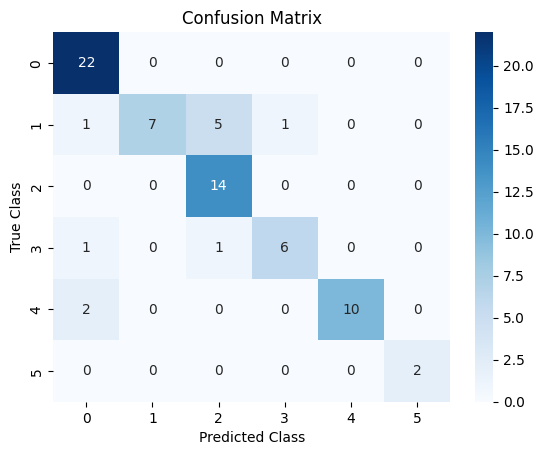

In [ ]:
knn_sm = KNeighborsClassifier(7, metric = heom_metric.heom)

# Train the classifier with the training data
knn_sm.fit(X_smote, y_smote)

# Predict the class label for the test data
y_pred_sm = knn_sm.predict(X_test)
conf_mat2 = confusion_matrix(y_test, y_pred_sm)

sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_sm))

Classification Report:
              precision    recall  f1-score   support

           1       0.85      1.00      0.92        22
           2       1.00      0.50      0.67        14
           3       0.70      1.00      0.82        14
           4       0.86      0.75      0.80         8
           5       1.00      0.83      0.91        12
           6       1.00      1.00      1.00         2

    accuracy                           0.85        72
   macro avg       0.90      0.85      0.85        72
weighted avg       0.88      0.85      0.84        72



In [ ]:
def g_mean(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    sensitivity = np.zeros(num_classes)
    specificity = np.zeros(num_classes)
    total_samples = np.sum(confusion_matrix)

    for i in range(num_classes):
        true_positive = confusion_matrix[i, i]
        false_positive = np.sum(confusion_matrix[:, i]) - true_positive
        false_negative = np.sum(confusion_matrix[i, :]) - true_positive
        true_negative = total_samples - true_positive - false_positive - false_negative

        sensitivity[i] = true_positive / (true_positive + false_negative)
        specificity[i] = true_negative / (true_negative + false_positive)

    g_mean_score = np.prod(sensitivity) ** (1/num_classes)
    return g_mean_score, sensitivity, specificity

In [ ]:
# matriks konfusi 6x6
confusion_matrix_smote = confusion_matrix(y_test, y_pred_sm)
confusion_matrix_smote

array([[22,  0,  0,  0,  0,  0],
       [ 1,  7,  5,  1,  0,  0],
       [ 0,  0, 14,  0,  0,  0],
       [ 1,  0,  1,  6,  0,  0],
       [ 2,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  2]])

In [ ]:
g_mean_score = g_mean(confusion_matrix_smote)
print("G-Mean:", g_mean_score)

G-Mean: (0.8237744862210329, array([1.        , 0.5       , 1.        , 0.75      , 0.83333333,
       1.        ]), array([0.92      , 1.        , 0.89655172, 0.984375  , 1.        ,
       1.        ]))


#FEATURE IMPORTANCE KNN


In [ ]:
feature_knn = KNeighborsClassifier(metric = heom_metric.heom)
feature_knn.fit(X_smote, y_smote)

feature_names = list(data.columns.values[0:-1])

In [ ]:
# perform permutation importance
results = permutation_importance(feature_knn, X_smote, y_smote, scoring='accuracy')

In [ ]:
# get importance
importance = results.importances_mean

In [ ]:
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
# plot feature importance
pyplot.figure(figsize=(10,7))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel('Feature')
pyplot.ylabel('Score')
pyplot.title('Feature Importance')
pyplot.show()